In [1]:
# Final Project, AST4930 - Exoplanets. By Grady Robbins

In [2]:
#Run once:
!pip install pytransit
!pip install pyrr
!pip install emcee
!pip install corner
!pip install astropy
!pip install arviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pytransit import QuadraticModel
from decimal import Decimal
import emcee
import corner
from IPython.display import display, Math
import csv 
from numpy import savetxt
from numpy import loadtxt
from multiprocessing import Pool

/apps/jupyter/6.5.2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The semimajor axis of this orbit is 0.05076730399152996AU


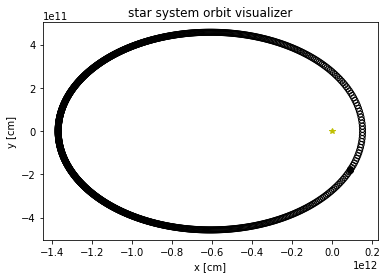

the black circle is the starting point of the orbit
the velocity of the planet at transit is 282.5168939593794 km/s
the planets position intersects the center of the star (origin) between -.77 and .77 solar radii as expected, and the transit is ~1 hour long


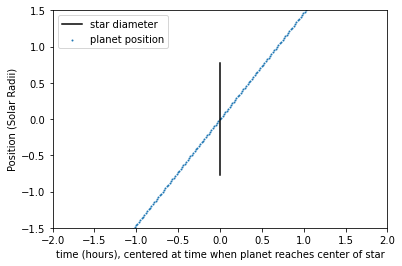

In [33]:
#-----------DATA FROM HOMEWORK 4---------------------

#unique star and planet properties:
Mstar_solar = 0.72 #solar masses
Rstar_solar = 0.77 #solar radii
P = 4.931 #days
i = 89.57*np.pi/180 #rad, inclination
e = 0.8 #eccentricity
peri = 62.86*np.pi/180 #rad, longitude of periaps
Rplanet_earth = 4.16 #Earth radii
Mplanet_earth = 20.8 #Earth masses

#orbital code from hw 3:
                                                                                   
#Orbit computes the orbit of a small mass about a much larger mass.                                           
                                                                                            
#Adapted from:                                                                                                                                                                                                           
#"An Introduction to Modern Astrophysics", Appendix J                                                         
#Bradley W. Carroll and Dale A. Ostlie                                                                        
#Second Edition, Addison Wesley, 2007                                                                                                                                                                                                                                               
###################################################################

#Import needed packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
from decimal import Decimal

#Define needed constants
G = 6.67E-8                 ##units: cm**3 / g / s**2
cm_per_AU = 1.5E13          ##units: cm
Msun = 2.0E33                ##units: g
Mearth = 5.972E27            ##units: g
s_per_day = 60. * 60. * 24. ##units: s
R_sun=6.955e10 #cm
R_earth = 6.378e+8

#Prompt user for input variables
ecc = e
omega = 62.86
Planet_period_days = P
Planet_period_seconds = Planet_period_days*s_per_day

#TO DO: Convert input values to cgs units 
Mstar = Mstar_solar*Msun # star mass to grams
Mplanet = Mplanet_earth*Mearth #planet mass to grams
semi_maj = (((Planet_period_seconds**2)*G*(Mstar))/(4*(np.pi**2)))**(1/3) #semimajor axis to centimeters

omega = omega*np.pi/180 #define orbital rotation
#TO DO: Calculate the orbital period with Kepler's 3rd Law  
#P**2 = a**3 *4*pi**2 / (G*Mstar) planet mass << star mass
#TO DO: Output period of orbit to user and prompt for # of steps (replace placeholder period with real period)

print("The semimajor axis of this orbit is " + str(semi_maj/cm_per_AU) + "AU")
#nstep = float(input("Number of time steps to be calculated: "))
nstep = 1000
#TO DO: Calculate timestep size.                                                                                     
step_size_s = Planet_period_seconds / nstep

#TO DO: Define intial values for variables to be changed with each time step.                                                    

rmin = (semi_maj*(1-ecc**2))/(1+ecc) #define rmin, rmax for reference
rmax = (semi_maj*(1-ecc**2))/(1-ecc)
theta = 2*np.pi - omega #inital rotation
r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
r0 = r
x = r*np.cos(theta)
y = r*np.sin(theta)
x0 = x
y0 = y
t = 0
Lpermass = (G*Mstar*semi_maj*(1-ecc**2))**(1/2)
x_list = [x] #creating lists to append and graph
y_list = [y]
t_list = [t]
r_list = [r]
#TO DO: Make time steps move forward (for loop or while statement)
for n in range(int(nstep)):    
    deltheta = Lpermass*step_size_s/(r**2)
    #TO DO: within the for or while loop, perform the following steps
    theta = theta + deltheta
    #Calculate distance of object from principle focus                                                        
    r = (semi_maj*(1-ecc**2))/(1+(ecc*np.cos(theta)))
    #Calculate cartesian coordinates and save to array                                                        
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #Update time                                                                                                                                                                   
    t = t + step_size_s
    #Calculate angular momentum per unit mass.   (doesn't change)                                                             
    #Calculate next theta value based on ang. momentum per unit mass.
    x_list.append(x)
    y_list.append(y)
    t_list.append(t)
    r_list.append(r)

#TO DO: Plot orbital path.  

#These are placeholder X and Y arrays-- yours will contain the X and Y positions of the planet
x_arr = np.array(x_list)
y_arr = np.array(y_list) #converting to arrays for math
t_arr = np.array(t_list)
r_arr = np.array(r_list)
rmin = min(r_list)

for n in range(len(r_list)):
    if rmin == r_list[n]:
        T_peri_eff = t_list[n] #calculating time of perihelion
        
dxdt = ((x_arr[0:-1] - x_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
dydt = ((y_arr[0:-1] - y_arr[1:])/(t_arr[0:-1]-t_arr[1:]))
speed = ((dxdt**2 + dydt**2)**(.5)) 
Kinetic_E = .5*Mplanet*(speed**2)
Potential_E = -G*Mplanet*Mstar/r_arr

T_peri_real = (T_peri_eff) / s_per_day
t_list_day = t_arr / s_per_day/ 365
#fig = plt.figure(figsize=(5,5))
plt.scatter(x_arr, y_arr, facecolors = 'none', edgecolors = 'black')    #Orbital path                                            
plt.plot(0, 0, 'y*')    #Stellar host
plt.plot(x0, y0, 'ko') #stating point
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('star system orbit visualizer')
plt.show()
print('the black circle is the starting point of the orbit')
print('the velocity of the planet at transit is',speed[0]/10**5,'km/s')

#-------------------------------PART 3 -----------------------------------
#From jupyter notebook:

period=P #insert your period here in days

##### DO NOT ALTER THIS. This snippet of code calculates the time array you should use to generate your lightcurves, 
#both from scratch and using exisiting python packages
M_star_low=0.1
M_star_high=10.0

R_high=((M_star_high)**0.57)*R_sun #MR scaling relations for MS stars
R_low=((M_star_low)**0.8)*R_sun

a_high=(((period*s_per_day)**2.0*G*M_star_high*Msun)/(4*np.pi**2.0))**(1.0/3.0)
a_low=(((period*s_per_day)**2.0*G*M_star_low*Msun)/(4*np.pi**2.0))**(1.0/3.0)

duration_high=period*s_per_day/np.pi*(R_high/a_high)
duration_low=period*s_per_day/np.pi*(R_low/a_low)

#Calculating number of 1 min exoposure needed for a 3 hour duration window, 
#if eccentricity is as high as 0.9 and planet transits at apastron
n_high=3*duration_high*(np.sqrt(1-0.9**2)/(1-0.9))/60.
n_low=3*duration_low*(np.sqrt(1-0.9**2)/(1-0.9))/60.

single_transit_time_array=(np.arange(0,n_high)-n_high/2.0)/(60*24) #Short time array in days, centered on a single transit event
#Use the time array below to eventually produce the time array for your lightcurve
time_array=np.concatenate(((np.arange(0,n_high)-n_high/2.0)/(60*24),(np.arange(0,n_high)-n_high/2.0)/(60*24.0)+period)) 
time_array=np.concatenate((time_array,(np.arange(0,n_high)-n_high/2.0)/(60*24)+period*2.0)) #Long time array in days, which will include three transit events

position = single_transit_time_array*24*3600*speed[0] #position in cm
position_Rsun = position/R_sun
plt.plot(np.linspace(0,0,10),np.linspace(-0.77,0.77,10),color="black",label = 'star diameter')
plt.scatter(single_transit_time_array*24, position_Rsun, label = 'planet position',s=1)
#plt.plot(single_transit_time_array, np.linspace(-5,5,len(single_transit_time_array)))
plt.xlabel('time (hours), centered at time when planet reaches center of star')
plt.ylabel('Position (Solar Radii)')
plt.ylim(-1.5,1.5)
plt.xlim(-2,2)
plt.legend()
t_transit = 
print('the planets position intersects the center of the star (origin) between -.77 and .77 solar radii as expected, and the transit is ~1 hour long')

pi ~ 3.134
the transit depth here is ~ 0.2169751116783663 %


Text(0.5, 1.0, '10000 points, R = 0.77 Solar Radii')

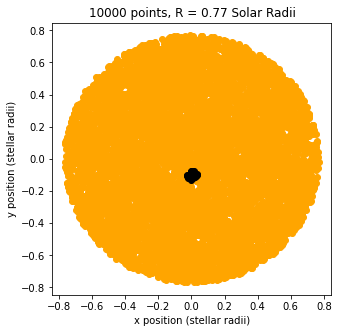

In [49]:
#Final Project 
#2:
#average transit depth of 0.22
b = semi_maj*np.cos(i)/(Rstar_solar*R_sun)
Rplanet_solar = Rplanet_earth*R_earth/R_sun
N_transit = 0
N_ins = 0
N_tot = 10000
x=[]
y=[]
xstar=[]
ystar=[]
xplanet=[]
yplanet=[]
xtransit=[]
ytransit=[]
for n in range(N_tot):
    x.append(np.random.uniform(-Rstar_solar,Rstar_solar))
    y.append(np.random.uniform(-Rstar_solar,Rstar_solar))
for n in range(N_tot):
    if (x[n]**2 + y[n]**2) <= Rstar_solar**2:
        N_ins +=1
        xstar.append(x[n])
        ystar.append(y[n])
    if ((x[n])**2 + (y[n]+b)**2) <= Rplanet_solar**2:
        xplanet.append(x[n])
        yplanet.append(y[n])
for n in range(len(xplanet)):
    if (xplanet[n]**2 + yplanet[n]**2) <= Rstar_solar**2:
        N_transit +=1
        xtransit.append(xplanet[n])
        ytransit.append(yplanet[n])
print('pi ~',4*N_ins/N_tot)
print('the transit depth here is ~',N_transit/N_ins*100,'%')
fig = plt.figure(figsize=(5,5))
plt.scatter(xstar,ystar, color = 'orange')
plt.scatter(xtransit,ytransit, color = 'black')
plt.xlabel('x position (stellar radii)')
plt.ylabel('y position (stellar radii)')
plt.title(str(N_tot)+' points, R = 0.77 Solar Radii')

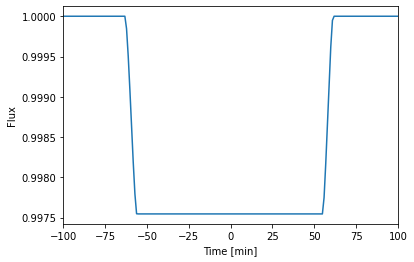

In [50]:
#PyTransit Transit Model:
tm = QuadraticModel()
tm.set_data(single_transit_time_array) #time needs to be specified in days

t0=0.
aonr=a_high/R_high
k= Rplanet_solar/Rstar_solar #R_p/R_star

single_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=t0, p=period, a=aonr, i=i,e=e,w=62.82*np.pi/180)

tm.set_data(time_array) #time needs to be specified in days
three_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=t0, p=period, a=aonr, i=i,e=e,w=62.82*np.pi/180)
plt.plot(single_transit_time_array*24*60/1,single_transit_lightcurve)
plt.xlabel('Time [min]')
plt.ylabel('Flux')
plt.xlim(-100,100)
plt.show()

In [65]:
transit_time_array_s = np.array([])
x_position_array_solar = np.array([])
transit_indice = []
for n in range(len(single_transit_time_array)): #reducing time array to area only around transit
    if position[n]/R_sun <= Rstar_solar*1.2 and position[n]/R_sun >= -Rstar_solar*1.2:
        transit_time_array_s = np.append(transit_time_array_s,single_transit_time_array[n]*3600*24)
        x_position_array_solar = np.append(x_position_array_solar,position[n]/R_sun)
        transit_indice.append(n)

In [100]:
#true transit depth of 0.24%
#this may take a moment
random_draw = np.random.uniform(-Rstar_solar,Rstar_solar)
Flux = np.array([])
for k in range(len(transit_time_array_s)): #calculating MCMC Flux at each position
    Rplanet_solar = Rplanet_earth*R_earth/R_sun
    N_transit = 0
    N_ins = 0
    N_tot = 100000
    x=[]
    y=[]
    xstar=[]
    ystar=[]
    xplanet=[]
    yplanet=[]
    xtransit=[]
    ytransit=[]
    for n in range(N_tot):
        x.append(np.random.uniform(-Rstar_solar,Rstar_solar))
        y.append(np.random.uniform(-Rstar_solar,Rstar_solar))
    for n in range(N_tot):
        if (x[n]**2 + y[n]**2) <= Rstar_solar**2:
            N_ins +=1
            xstar.append(x[n])
            ystar.append(y[n])
        if ((x[n]-x_position_array_solar[k])**2 + (y[n]+b)**2) <= Rplanet_solar**2:
            xplanet.append(x[n])
            yplanet.append(y[n])
    for n in range(len(xplanet)):
        if (xplanet[n]**2 + yplanet[n]**2) <= Rstar_solar**2:
            N_transit +=1
            xtransit.append(xplanet[n])
            ytransit.append(yplanet[n])
            if xtransit[0] < random_draw*1.1 and xtransit[0] > random_draw*0.9: #randomly draws a position to plot model
                Flux_star_point = 1 - N_transit/N_ins 
                time_star_point = transit_time_array_s[k]
                x_star_point = xtransit
                y_star_point = ytransit
    Flux = np.append(Flux,1 - ((N_transit/N_ins)))
    fig = plt.figure(figsize=(5,5))
    plt.scatter(xstar,ystar, color = 'orange')
    plt.scatter(xtransit,ytransit, color = 'black')
    plt.xlabel('x position (stellar radii)')
    plt.ylabel('y position (stellar radii)')
    plt.title(str(N_tot)+' points, R = 0.77 Solar Radii, point'+str(k))
    #plt.savefig('./Transit_Movie/transit_'+str(k)+'.png',dpi=300)
    plt.close()
print('done')

done


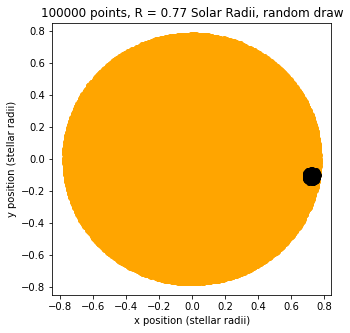

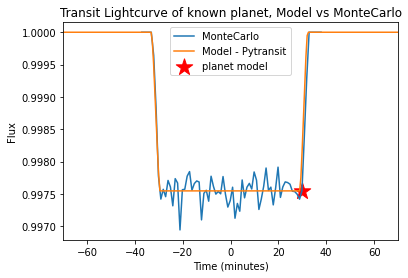

In [105]:
#Image 1: Transit model and Montecarlo Flux Comparison
fig = plt.figure(figsize=(5,5))
plt.scatter(xstar,ystar, color = 'orange')
plt.scatter(x_star_point,y_star_point, color = 'black')
plt.xlabel('x position (stellar radii)')
plt.ylabel('y position (stellar radii)')
plt.title(str(N_tot)+' points, R = 0.77 Solar Radii, random draw')
#plt.savefig('Transit_Model_known_GR.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(transit_time_array_s/60, Flux, label = 'MonteCarlo')
plt.plot(single_transit_time_array*24*60/1.9,single_transit_lightcurve, label = 'Model - Pytransit')
plt.scatter(time_star_point/60,Flux_star_point, marker = '*',label = 'planet model', s = 300,color = 'red')
plt.xlabel('Time (minutes)')
plt.ylabel('Flux')
plt.title('Transit Lightcurve of known planet, Model vs MonteCarlo')
plt.xlim(-70,70)
plt.legend()
#plt.savefig('Time_vs_Flux_known_GR.png',dpi=300,bbox_inches='tight')
plt.show()

In [106]:
#2) Part A, load in data
mystery_data = np.loadtxt('stellar_mass_0.81_stellar_radius_0.85.csv', dtype='float', delimiter=',', usecols=(0,1,2), unpack=True)

mystery_time_arr = mystery_data[0] #days?
mystery_flux_arr = mystery_data[1] #Flux
mystery_star_mass_solar = 0.81 
mystery_star_radius_solar = 0.85

estimations by eye:
P ~ 5 days
Rp/Rstar ~0.0282842712474619
a/Rstar ~13.517869513487804
i ~ pi/2 or 90 degrees
e ~ 0.2
w ~ 0 degrees

homemade lightcurve testing before:


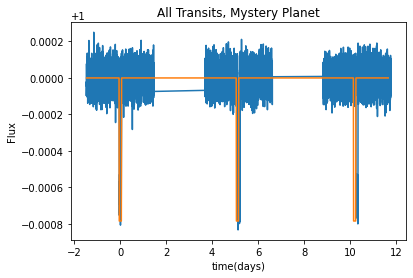

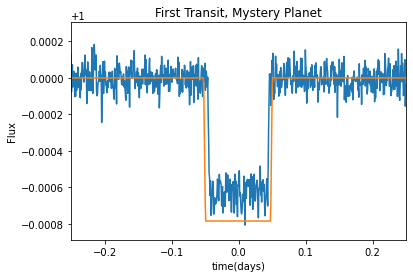

after a few trial and error plotting, e ~ 0.8 and w = 30 degrees creates a closer matching plot, and P is a little larger than 5 (~5.1-5.2)


In [122]:
# initial estimations
a_estimate = (((5*24*3600)**2)*6.67e-11*(mystery_star_mass_solar*Msun/1000)/4/(np.pi**2))**(1/3)
print('estimations by eye:')
print('P ~ 5 days')
print('Rp/Rstar ~'+str(np.sqrt(.0008)))
print('a/Rstar ~'+str(a_estimate*1.4374e-9/mystery_star_radius_solar))
print('i ~ pi/2 or 90 degrees')
print('e ~ 0.2')
print('w ~ 0 degrees')
print()
print('homemade lightcurve testing before:')
#model:
period=5.1 #insert your period here in days

##### DO NOT ALTER THIS. This snippet of code calculates the time array you should use to generate your lightcurves, 
#both from scratch and using exisiting python packages
M_star_low=0.1
M_star_high=10.0

R_high=((M_star_high)**0.57)*R_sun #MR scaling relations for MS stars
R_low=((M_star_low)**0.8)*R_sun

a_high=(((period*s_per_day)**2.0*G*M_star_high*Msun)/(4*np.pi**2.0))**(1.0/3.0)
a_low=(((period*s_per_day)**2.0*G*M_star_low*Msun)/(4*np.pi**2.0))**(1.0/3.0)

duration_high=period*s_per_day/np.pi*(R_high/a_high)
duration_low=period*s_per_day/np.pi*(R_low/a_low)

#Calculating number of 1 min exoposure needed for a 3 hour duration window, 
#if eccentricity is as high as 0.9 and planet transits at apastron
n_high=3*duration_high*(np.sqrt(1-0.9**2)/(1-0.9))/60.
n_low=3*duration_low*(np.sqrt(1-0.9**2)/(1-0.9))/60.

single_transit_time_array=(np.arange(0,n_high)-n_high/2.0)/(60*24) #Short time array in days, centered on a single transit event
#Use the time array below to eventually produce the time array for your lightcurve
time_array=np.concatenate(((np.arange(0,n_high)-n_high/2.0)/(60*24),(np.arange(0,n_high)-n_high/2.0)/(60*24.0)+period)) 
time_array=np.concatenate((time_array,(np.arange(0,n_high)-n_high/2.0)/(60*24)+period*2.0)) #Long time array in days, which will include three transit events

tm = QuadraticModel()
tm.set_data(single_transit_time_array) #time needs to be specified in days
# trial and error guesses
t0=0.
aonr=a_high/R_high
k= .028 #R_p/R_star
i = np.pi*90/180
e = 0.8
w = 30*np.pi/180
single_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=t0, p=period, a=aonr, i=i,e=e,w=w)

tm.set_data(time_array) #time needs to be specified in days
three_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=t0, p=period, a=aonr, i=i,e=e,w=w)

#actual

plt.plot(mystery_time_arr,mystery_flux_arr,label = 'Transit - Actual')
plt.plot(time_array,three_transit_lightcurve, label = 'Transit - Guess')
plt.xlabel('time(days)')
plt.ylabel('Flux')
plt.title('All Transits, Mystery Planet')
plt.show()

plt.plot(mystery_time_arr,mystery_flux_arr,label = 'Transit - Actual')
plt.plot(single_transit_time_array,single_transit_lightcurve,label = 'Transit - Guess')
plt.xlabel('time(days)')
plt.ylabel('Flux')
plt.title('First Transit, Mystery Planet')
plt.xlim(-.25,.25)
plt.show()
print('after a few trial and error plotting, e ~ 0.8 and w = 30 degrees creates a closer matching plot, and P is a little larger than 5 (~5.1-5.2)')

testing using starter notebook:


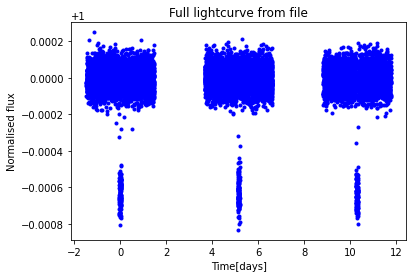

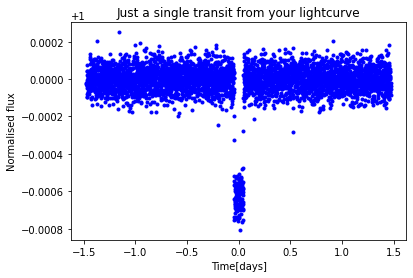

[5.15, 0.028, 13, 90.0, 0.9, 200]


In [123]:
print('testing using starter notebook:')
s_per_day=24*3600.
M_sun=1.989e33 #g
R_sun=6.955e10 #cm
G=6.673e-8          ##units: cm**3 / g / s**2
cm_per_AU = 1.5E13          ##units: cm
g_per_MEarth=5.972e+27      ##units: g
cm_per_REarth=6.37e8 #cm 
cm_per_RSun=6.955e10

#Stellar mass [M_sun]:
Mstar_solar = 0.66
#Stellar radius [R_sun]:
Rstar_solar=0.72

data = loadtxt('stellar_mass_0.81_stellar_radius_0.85.csv', delimiter=',')
time_array=data[:,0]
flux=data[:,1]
flux_err=data[:,2]
single_transit_time_array=time_array[0:round(len(time_array)/3)-1]
single_transit_flux_array=flux[0:round(len(time_array)/3)-1]

plt.plot(time_array,flux,'b.')
plt.title("Full lightcurve from file")
plt.xlabel("Time[days]")
plt.ylabel("Normalised flux")
plt.show()

plt.plot(single_transit_time_array,single_transit_flux_array,'b.')
plt.title("Just a single transit from your lightcurve")
plt.xlabel("Time[days]")
plt.ylabel("Normalised flux")
plt.show()

def f_lightcurve(time,period,rponr,aonr,inc,ecc,omega):
    """
    Function for computing transit models for the set of 8 free paramters
    x - time array
    """
    tm = QuadraticModel()
    tm.set_data(time)
    om=omega/180*np.pi
    i=inc/180.0*np.pi
    lightcurve=tm.evaluate(k=rponr, ldc=[0.0, 0.0], t0=0.0, p=period, a=aonr, i=i,e=ecc,w=om)
    return lightcurve

guess_period=5.15
guess_ronr=0.028
guess_aonr=13
guess_inc=90.0
guess_ecc=0.9
guess_omega=200

guess=[guess_period, guess_ronr, guess_aonr, guess_inc,guess_ecc,guess_omega]




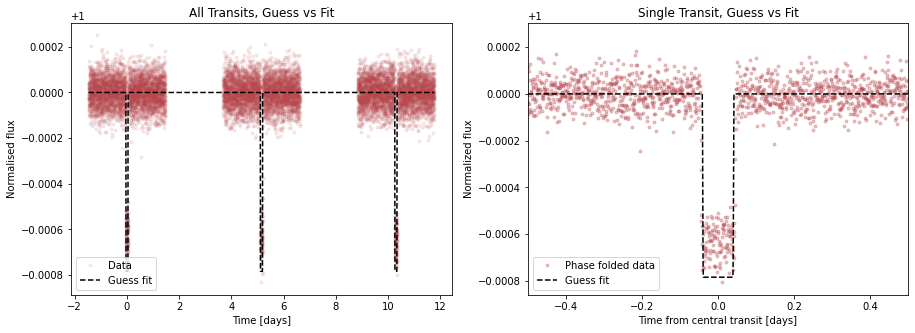

a guess of [5.15, 0.028, 13, 90.0, 0.9, 200] was used for this model


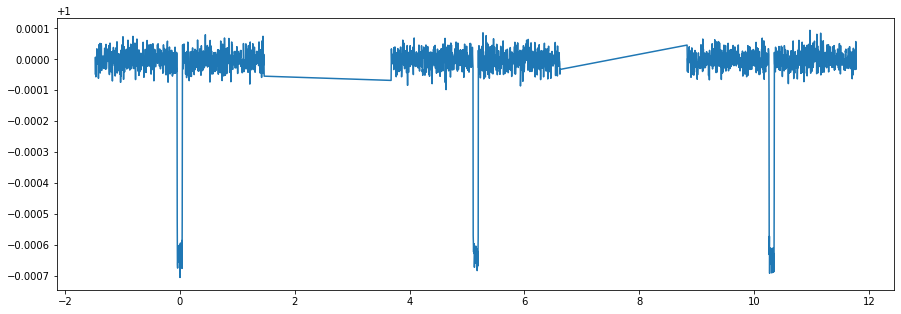

In [128]:
#2) Part B
plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1, 2, 1)
plt.plot(time_array,flux,".", color='xkcd:dusty red', label='Data', alpha=0.1)
guess_lightcurve=f_lightcurve(time_array,*guess)
plt.plot(time_array,guess_lightcurve,'--k', label='Guess fit')
plt.legend(loc="lower left")
plt.ylabel("Normalised flux")
plt.xlabel("Time [days]")
plt.title('All Transits, Guess vs Fit')
plt.subplot(1, 2, 2)
## Plot data & model together, phase fold
plt.plot(single_transit_time_array, single_transit_flux_array, ".", color='xkcd:dusty red', label='Phase folded data', alpha=0.3)
plt.plot(single_transit_time_array, f_lightcurve(single_transit_time_array,*guess), '--k', label='Guess fit')
#plt.plot(phase[sorted]*truth[0], true_lightcurve[sorted], '--b', label='Actual fit')
plt.legend(loc="lower left")
plt.xlim(-0.5, 0.5)
plt.xlabel("Time from central transit [days]")
plt.ylabel("Normalized flux")
plt.title('Single Transit, Guess vs Fit')


plt.savefig('2_Mystery_Planet_vs_Guess_GR',dpi=300, bbox_inches='tight')

plt.show()
def rebin(nbin,time,flux):
    start_interval=time[1]-time[0]
    bin_interval=(start_interval)*nbin
    flux_bin=[]
    time_bin=[]
    err_bin=[]
    tmax=np.min(time)
    i=0
    while tmax<np.max(time):
        bincenter=np.min(time)+(i+0.5)*bin_interval
        index=np.where(np.abs(time-bincenter) < bin_interval/2.0)
        if len(time[index]):
            flux_bin=np.append(flux_bin,np.mean(flux[index]))
            time_bin=np.append(time_bin,np.mean(time[index]))
            err_bin=np.append(err_bin,np.std(flux[index])) 
            tmax=np.max(time[index])        
        i=i+1

    return time_bin,flux_bin,err_bin
        
time_bin,flux_bin,err_bin=rebin(5,time_array,flux)
#print(len(time_bin))
plt.plot(time_bin,flux_bin)
#print(time_bin[1]-time_bin[0])

m = np.median(err_bin[err_bin > 0])
# Assign the median to the zero elements 
err_bin[err_bin == 0] = m
print('a guess of',guess,'was used for this model')

In [129]:
#How much can the MCMC stray from the original guesses?
priors = [guess_period*0.9, guess_period*1.1,
          guess_ronr*0.5,guess_ronr*1.5,
         guess_aonr*0.3,guess_aonr*3.0,
         0, 90,
         0,0.99 ,
         0, 360]

#This function calculates the ``goodness of fit" of the model, using chi-squared
def log_likelihood(theta, time, flux, flux_err):
#     t0, per, rp, a, inc, ecc, w, baseline = theta
    model = f_lightcurve(time, *theta)
    sigma2 = flux_err ** 2 
    return -0.5 * np.sum((flux - model) ** 2 / sigma2 + np.log(2. * np.pi*sigma2))

#This function tells the code to spit the guess back if it wanders outside the acceptable range 
def log_prior(theta):
    # The parameters are stored as a vector of values, so unpack them
    per, rp, a, inc, ecc, w = theta
    # We're using only uniform priors:
    if priors[0] > per or per > priors[1]:
        return -np.inf
    if priors[2] > rp or rp > priors[3]:
        return -np.inf
    if priors[4] > a or a > priors[5]:
        return -np.inf
    if priors[6] > inc or inc > priors[7]:
        return -np.inf
    if priors[8] > ecc or ecc > priors[9]:
        return -np.inf
    if priors[10] > w or w > priors[11]:
        return -np.inf  
    return 0.0

## The full log-probability function is:
def log_probability(theta, time, flux, flux_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    #print(log_likelihood(theta, time, flux, flux_err))
    return lp + log_likelihood(theta, time, flux, flux_err)
#We have six dimensions!
ndim = 6
nwalkers = ndim*4  # Number of walkers. It is recommended to be at least higher than twice 
                   # the amount of parameters being fit

# theta = [per , rp, , a, inc, ecc,omega ]
order_of_mag = np.array([1e-3, 1e-3, 0.5, 1e-3, 0.1,10])

pos = guess+ order_of_mag * np.random.randn(nwalkers, ndim)

# If you *do not* want to use parallelization
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(time_bin, flux_bin, err_bin))
sampler.run_mcmc(pos, 50000, progress=True);


100%|██████████| 50000/50000 [03:39<00:00, 227.79it/s]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

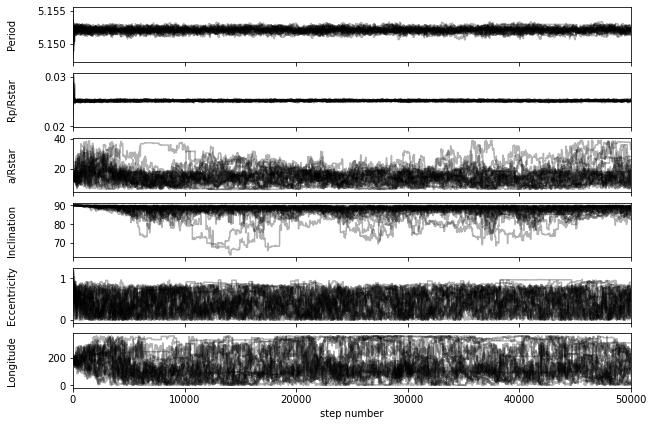

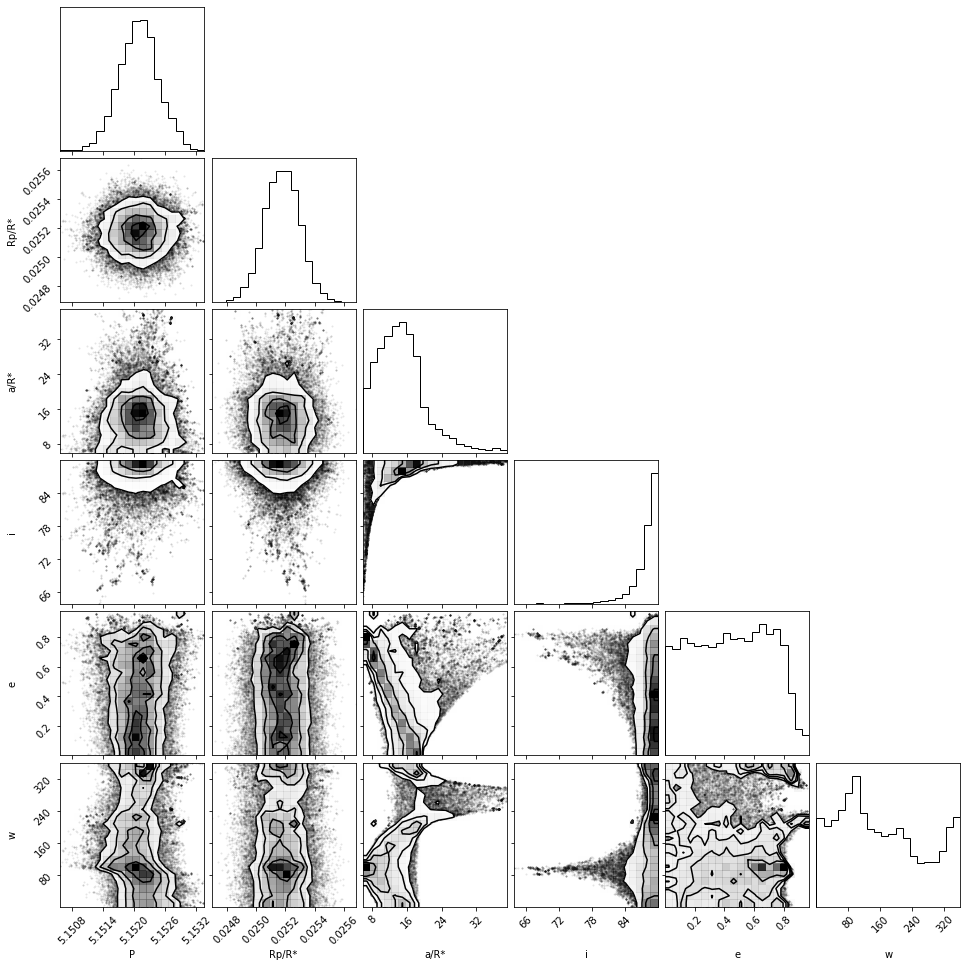

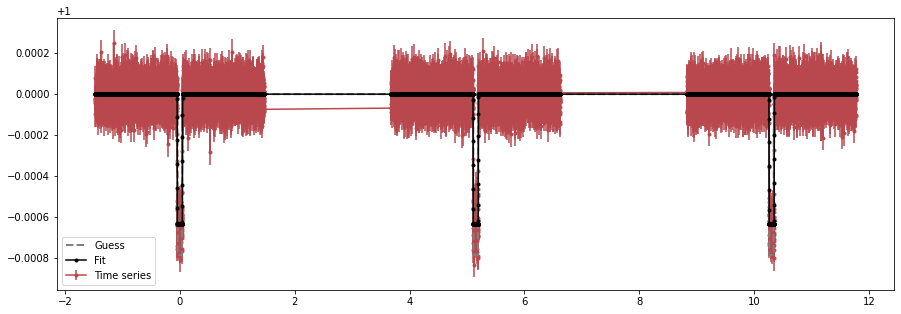

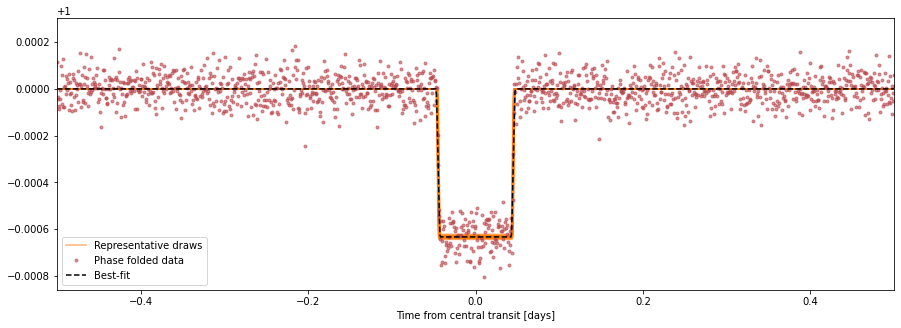

In [137]:
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["Period", "Rp/Rstar", "a/Rstar","Inclination","Eccentricity","Longitude"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]

flat_samples = sampler.get_chain(discard=500, thin=20, flat=True)

labels = ["P", "Rp/R*", "a/R*", "i","e", "w" ]

fit = np.array([])

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
    txt = txt.format(theta_max[i], q[0], q[1], labels[i])
    display(Math(txt))
    fit = np.append(fit, theta_max[i])
    
fig = corner.corner(flat_samples, labels=labels)

plt.savefig('corner_plot_GR.png', dpi=300, bbox_inches='tight')
plt.figure(figsize=(15,5))

#Plot full data set and best-fit model together
flux_guess = f_lightcurve(time_array, *guess)
plt.plot(time_array, flux_guess, '--', color='gray', label='Guess', lw=2, zorder=3)
flux_fit = f_lightcurve(time_array, *fit)
plt.plot(time_array, flux_fit, 'k', label='Fit', marker='.',lw=1.5, zorder=10)
plt.errorbar(time_array, flux, flux_err,marker=".", color='xkcd:dusty red', label='Time series')

plt.legend()
plt.show()

#Zoom in, plot a single transit, the single best-fit model, and 100 other pretty good models that the fitter found
single_transit_fit = f_lightcurve(single_transit_time_array, *fit )

#Plot a representative sample of models from your fitter's exploration
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    flux_fit = f_lightcurve(single_transit_time_array, *sample )
    plt.plot(single_transit_time_array, flux_fit, "C1", alpha=0.1)

sample = flat_samples[0]
flux_fit = f_lightcurve(single_transit_time_array, *sample )
plt.plot(single_transit_time_array, flux_fit, "C1",label='Representative draws', alpha=0.6)
plt.plot(single_transit_time_array, single_transit_flux_array, ".", color='xkcd:dusty red', label='Phase folded data', alpha=0.6)
plt.plot(single_transit_time_array, single_transit_fit, '--k', label='Best-fit')

plt.legend()
plt.xlim(-0.5, 0.5)
plt.xlabel("Time from central transit [days]")
plt.savefig('fitting_results_GR.png', dpi=300, bbox_inches='tight')
plt.show()

In [131]:
#calculuating planet radius and period, compare:
mystery_transit_flux = []
transit_start_time = []
transit_end_time = []
for n in range(len(mystery_time_arr)):
    if mystery_flux_arr[n] < (1-.0004):
        transit_start_time.append(mystery_time_arr[n])
        break
for n in range(len(mystery_time_arr)):
    if mystery_time_arr[n] > transit_start_time[0]:
        if mystery_flux_arr[n] > (1-.0002):
            transit_end_time.append(mystery_time_arr[n])
            break
for n in range(len(mystery_time_arr)):
    if mystery_time_arr[n] > transit_end_time[0]:
        if mystery_flux_arr[n] < (1-.0004):
            transit_start_time.append(mystery_time_arr[n])
            break
for n in range(len(mystery_time_arr)):
    if mystery_time_arr[n] > transit_start_time[1]:
        if mystery_flux_arr[n] > (1-.0002):
            transit_end_time.append(mystery_time_arr[n])
            break
for n in range(len(mystery_time_arr)):
    if mystery_time_arr[n] > transit_end_time[1]:
        if mystery_flux_arr[n] < (1-.0004):
            transit_start_time.append(mystery_time_arr[n])
            break
for n in range(len(mystery_time_arr)):
    if mystery_time_arr[n] > transit_start_time[2]:
        if mystery_flux_arr[n] > (1-.0002):
            transit_end_time.append(mystery_time_arr[n])
            break
for n in range(len(mystery_time_arr)):
    if mystery_flux_arr[n] < (1 - .0004):
        mystery_transit_flux.append(mystery_flux_arr[n])
mystery_transit_flux = np.array(mystery_transit_flux)
mystery_depth_avg = np.mean(mystery_transit_flux)
mystery_r_ratio = np.sqrt(1 - mystery_depth_avg)
mystery_P =[]
for n in range(2):
    mystery_P.append(transit_end_time[2-n] - transit_end_time[1-n])
    mystery_P.append(transit_start_time[2-n] - transit_start_time[1-n])
P_mystery_avg = 0
for n in range(4):
    P_mystery_avg += mystery_P[n]
P_mystery_avg /= 4
print('the period of this planet is '+str(P_mystery_avg)+' days')
print('the ratio of planet radius to solar radius is '+str(mystery_r_ratio))

the period of this planet is 5.152106051840418 days
the ratio of planet radius to solar radius is 0.025152527652575533


In [138]:
print('Best Fit Results and Errors:')
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
    txt = txt.format(theta_max[i], q[0], q[1], labels[i])
    display(Math(txt))
    fit = np.append(fit, theta_max[i])

Best Fit Results and Errors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [145]:
print('P = 5.1521 +- 0.0004 days')
print('Rp/R* = 0.0252 +-0.0001')
print('a/R* = 32.4571 +- 4.9783')
print('i = 89.2674 +- 1.8530 degrees')
print('e = 0.7352 +- 0.2949')
print('w = 270.5927 +- 122.6973 degrees')
#assuming no error on R_star:
print('Rp =',0.0252*Rstar_solar*cm_per_RSun/cm_per_REarth,' M_Earth  +- ',0.0001*Rstar_solar*cm_per_RSun/cm_per_REarth)

P = 5.1521 +- 0.0004 days
Rp/R* = 0.0252 +-0.0001
a/R* = 32.4571 +- 4.9783
i = 89.2674 +- 1.8530 degrees
e = 0.7352 +- 0.2949
w = 270.5927 +- 122.6973 degrees
Rp = 1.9810285714285714  M_Earth  +-  0.007861224489795919
